# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:





---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [34]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [35]:
#code here
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Replace gaps forward from the previous valid value in: 'Umur'
    df = df.fillna({'Umur': df['Umur'].ffill()})
    # Replace gaps forward from the previous valid value in: 'Skor Belanja (1-100)'
    df = df.fillna({'Skor Belanja (1-100)': df['Skor Belanja (1-100)'].ffill()})
    return df

df_clean = clean_data(df.copy())
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        250 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


In [36]:
# function mencari outlier
def cari_outlier(df) :
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    hasil = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return hasil

In [37]:
print(cari_outlier(df_clean['Umur']))
print(cari_outlier(df_clean['Skor Belanja (1-100)']))

249    120.0
Name: Umur, dtype: float64
16    150.0
Name: Skor Belanja (1-100), dtype: float64


In [38]:
# function menghapus outliers
def hapus_outlier(df) :
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    hapus = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return hapus

In [39]:
df_hapus_outlier = hapus_outlier(df_clean[['Umur','Skor Belanja (1-100)']])
#df_hapus_outlier = hapus_outlier(df_clean['Skor Belanja (1-100)'])
df_hapus_outlier.dropna(axis=0, inplace=True)
df_hapus_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 248
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Umur                  248 non-null    float64
 1   Skor Belanja (1-100)  248 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


<Axes: xlabel='Umur'>

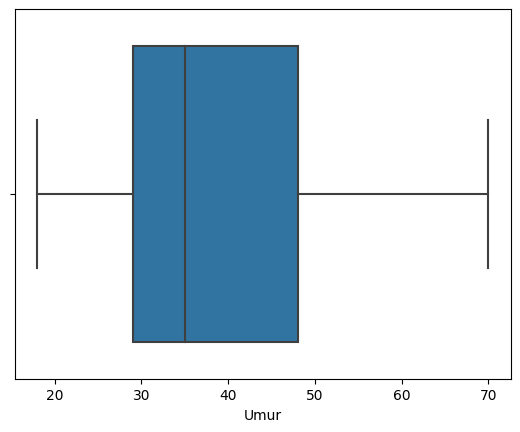

In [40]:
import seaborn as sns
sns.boxplot(x='Umur', data=df_hapus_outlier)

In [43]:
# rescaling menggunakan standardscaller
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
# rescaling
sc = StandardScaler()
data_outlier_std = sc.fit_transform(df_hapus_outlier.astype(float))

In [45]:
# clustering dengan Kmeans
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(data_outlier_std)
labels1 = kmeans1.labels_

c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
data_baru_std = pd.DataFrame(data=data_outlier_std, columns=['Umur', 'Skor Belanja (1-100)'])
data_baru_std['label_kmeans1'] = labels1

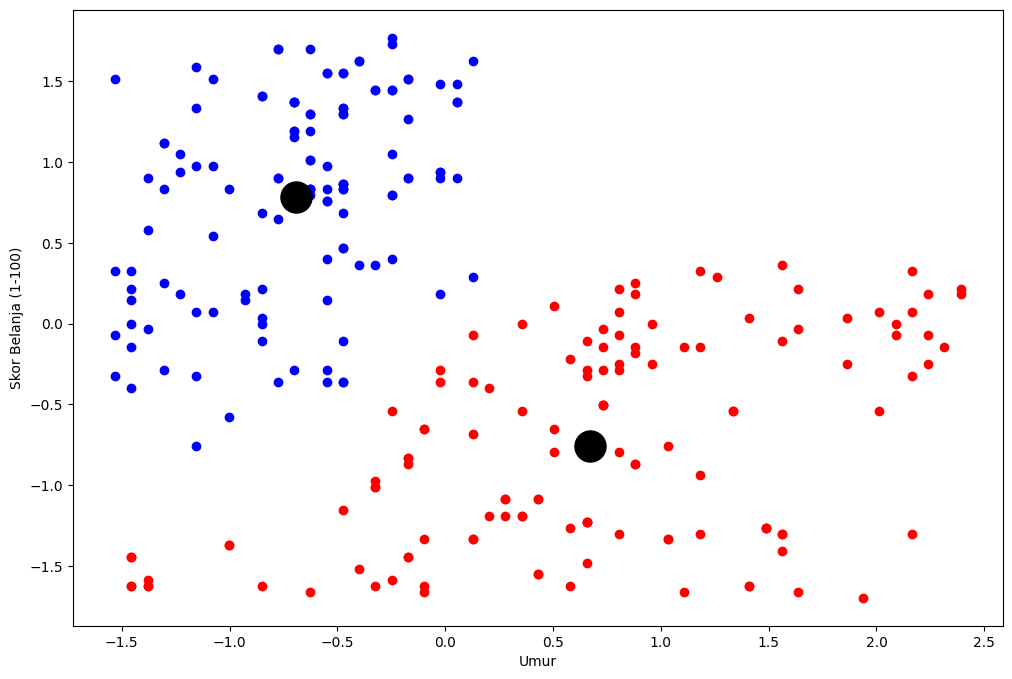

In [50]:
# visualisasikan
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(data_baru_std.Umur[data_baru_std.label_kmeans1 == 0], data_baru_std['Skor Belanja (1-100)'][data_baru_std.label_kmeans1 == 0], c='blue')
plt.scatter(data_baru_std.Umur[data_baru_std.label_kmeans1 == 1], data_baru_std['Skor Belanja (1-100)'][data_baru_std.label_kmeans1 == 1], c='red')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

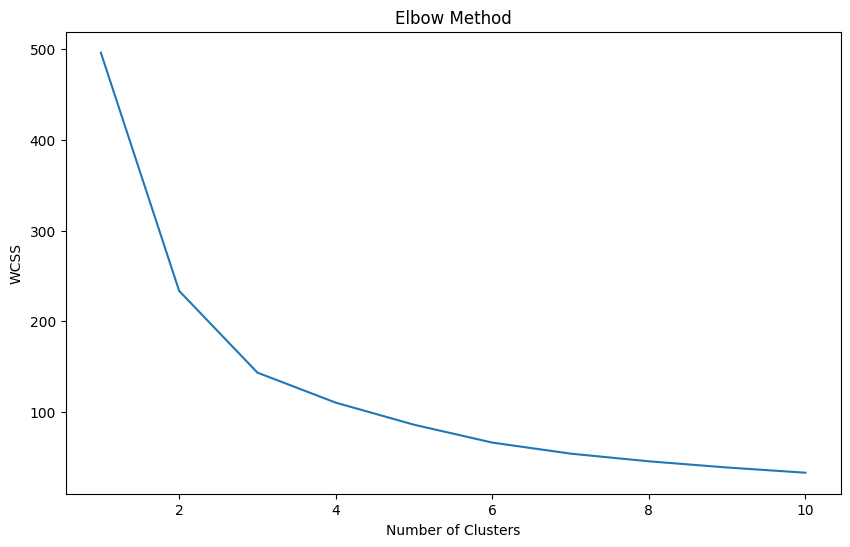

In [54]:
# menemukan jumlah cluster yg tepat menggunakan elbow method
plt.figure(figsize=(10,6))
wcss = []
for i in range(1, 11) :
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(data_outlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
    
plt.show()

In [56]:
# dari hasil elbow method diatas direkomendasikan untuk menggunakan 3 cluster

kmeans2 = KMeans(n_clusters=3, random_state=42).fit(data_outlier_std)
labels2 = kmeans2.labels_
data_baru_std = pd.DataFrame(data=data_outlier_std, columns=['Umur', 'Skor Belanja (1-100)'])
data_baru_std['label_kmeans2'] = labels2

c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


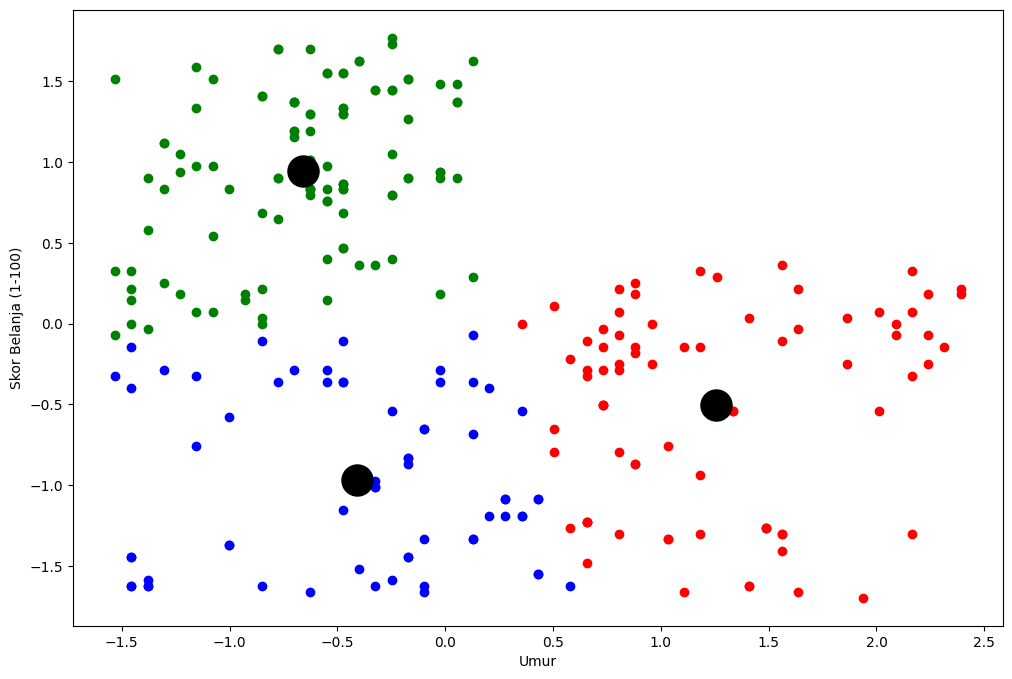

In [58]:
# visualisasi 3 cluster
plt.figure(figsize=(12,8))
plt.scatter(data_baru_std.Umur[data_baru_std.label_kmeans2 == 0], data_baru_std['Skor Belanja (1-100)'][data_baru_std.label_kmeans2 == 0], c='blue')
plt.scatter(data_baru_std.Umur[data_baru_std.label_kmeans2 == 1], data_baru_std['Skor Belanja (1-100)'][data_baru_std.label_kmeans2 == 1], c='red')
plt.scatter(data_baru_std.Umur[data_baru_std.label_kmeans2 == 2], data_baru_std['Skor Belanja (1-100)'][data_baru_std.label_kmeans2 == 2], c='green')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [60]:
# menghitung silhoutte coeffisiens dari 2 hasil prediksi cluster
from sklearn.metrics import silhouette_score
print(silhouette_score(data_outlier_std, labels=labels1))
print(silhouette_score(data_outlier_std, labels=labels2))

0.48555152598842644
0.4658669848365053


kesimpulan hasil dari perhitungan silhoutte coeffisien tersebut diatas bahwa walaupun silhoutte score yang pertama dengan k=2 lebih besar dari yang kedua yaitu dengan k=3, tetapi untuk kemudahaan menganalisa dan mudah untuk dipahami adalah untuk cluster yg jumlah k=3 yaitu silhoutte score yang kedua.

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:<br>
Dari hasil clustering utk k=3 bahwa segmentasi yang harus kita berikan perhatian lebih adalah cluster yg berwarna biru dengan rentang umur muda dengan tingkat score belanja yang tinggi, Dengan memberikan bundling, diskon dll.